In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
DIR = Path(".").absolute()
sys.path.append(str(DIR.parent))


In [3]:
import pickle
import torch

with open("tmp2.pkl", "rb") as f:
    d = pickle.load(f)
data_train = d["data_train"]
data_test = d["data_test"]
test_set = d["test_set"]

import train
model = train.Autoencoder(32, 100, num_input_channels=3)
model.load_state_dict(torch.load("tmp-model2.pt"))#, map_location=torch.device("cpu"))

/tmp/ipykernel_993991/1311910729.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("tmp-model2.pt"))#, map_location=torch.device("cpu"))


<All keys matched successfully>

In [4]:
import pandas as pd
df_train = pd.DataFrame(data_train)
df = pd.DataFrame(data_test)
df.head()

,epoch_time,initial_batch_size,max_batch_size,batch_growth_rate,dampingfactor,dampingdelay,epochs,verbose,lr,no_cuda,...,test_prefix,_epochs,_num_examples,_train_time,damping,_step_time,time,step_time,lr_,batch_size_
0,1.723672e+09,64,58605,0.01,5.0,5,0.000000,1,0.01,False,...,test,1.0,58624.0,16.250245,NaN,NaN,NaN,NaN,NaN,NaN
1,1.723672e+09,64,58605,0.01,5.0,5,1.000324,1,0.01,False,...,test,1.0,58624.0,15.578255,64.0,0.016613,1.723672e+09,0.016635,0.01,64.0
2,1.723672e+09,64,58605,0.01,5.0,5,2.000648,1,0.01,False,...,test,1.0,58624.0,15.616293,64.0,0.016815,1.723672e+09,0.016839,0.01,64.0
3,1.723672e+09,64,58605,0.01,5.0,5,3.000973,1,0.01,False,...,test,1.0,58624.0,15.590462,64.0,0.016980,1.723672e+09,0.017042,0.01,64.0
4,1.723672e+09,64,58605,0.01,5.0,5,4.001297,1,0.01,False,...,test,1.0,58624.0,15.640750,64.0,0.017138,1.723672e+09,0.017163,0.01,64.0


In [5]:
df["test_loss"] #/ df.iloc[0]["test_loss"]

0     611.879592
1      89.197080
2      59.847888
3      50.251479
4      43.965923
5      38.730472
6      34.991302
7      32.365595
8      30.543217
9      29.191203
10     27.108755
11     25.975086
12     25.085854
13     23.723512
14     23.056371
15     22.636161
16     21.796277
17     20.850932
18     20.249471
19     20.716479
20     20.198926
21     19.558188
22     18.797571
23     18.935278
24     18.275306
25     17.791573
26     17.802952
27     17.364870
28     17.074211
29     17.327391
30     16.504040
31     16.597210
32     16.333059
33     15.861286
34     15.704926
35     15.472684
36     15.913400
37     15.546847
38     14.956988
39     14.991898
40     14.661945
41     15.019831
42     14.403001
43     14.460286
44     14.192549
45     13.993049
46     14.276125
47     14.409412
48     13.746449
49     13.733798
50     13.567119
Name: test_loss, dtype: float64

In [15]:
list(sorted(df.columns))

['_epochs',
 '_num_examples',
 '_step_time',
 '_train_time',
 'approx_loss',
 'approx_rate',
 'batch_growth_rate',
 'batch_loss',
 'batch_size_',
 'damper',
 'damping',
 'dampingdelay',
 'dampingfactor',
 'dataset',
 'device_type',
 'dwell',
 'epoch_time',
 'epochs',
 'ident',
 'init_seed',
 'initial_batch_size',
 'len_dataset',
 'len_test_x',
 'len_test_y',
 'len_train_x',
 'len_train_y',
 'loss_name',
 'lr',
 'lr_',
 'max_batch_size',
 'model_updates',
 'momentum',
 'nesterov',
 'no_cuda',
 'num_examples',
 'num_params',
 'opt_name',
 'opt_param_differentiable',
 'opt_param_eps',
 'opt_param_foreach',
 'opt_param_fused',
 'opt_param_initial_accumulator_value',
 'opt_param_lr',
 'opt_param_lr_decay',
 'opt_param_maximize',
 'opt_param_weight_decay',
 'random_state',
 'rho',
 'step_time',
 'test_accuracy',
 'test_device',
 'test_freq',
 'test_loss',
 'test_prefix',
 'test_x_sum',
 'test_y_sum',
 'time',
 'train_x_sum',
 'train_y_sum',
 'tuning',
 'verbose',
 'weight_decay']

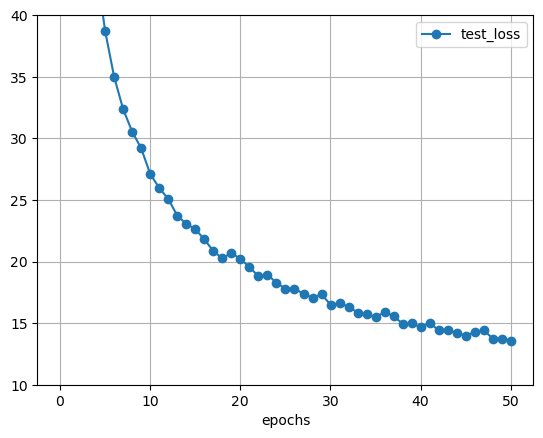

In [14]:
ax = df.plot(x="epochs", y="test_loss", style="o-")
ax.set_ylim(10, 40)
ax.grid()
# ax.set_yscale("log")

(0.0, 40.0)

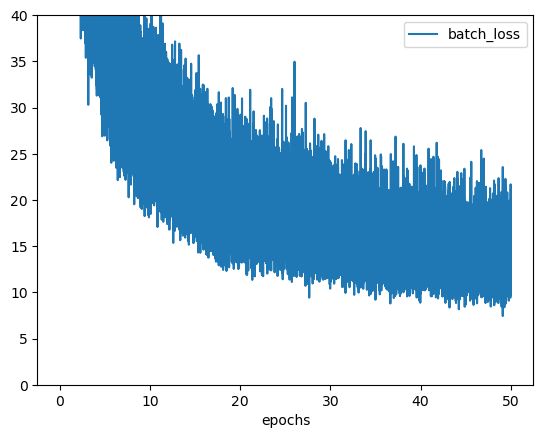

In [12]:
ax = df_train.plot(x="epochs", y="batch_loss")
ax.set_ylim(0, 40)
# ax.set_yscale("log")

In [9]:
def itransform(x, mean=0.1307, std=0.3081):
    return (x * std) + mean

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)
(32, 32, 3)
0.2261506 -0.15323527
(32, 32, 3)
(32, 32, 3)
0.35422355 0.006251782
(32, 32, 3)
(32, 32, 3)
0.40255296 0.0014188439
(32, 32, 3)
(32, 32, 3)
0.32280946 -0.085574105
(32, 32, 3)
(32, 32, 3)
0.17057179 -0.09282352


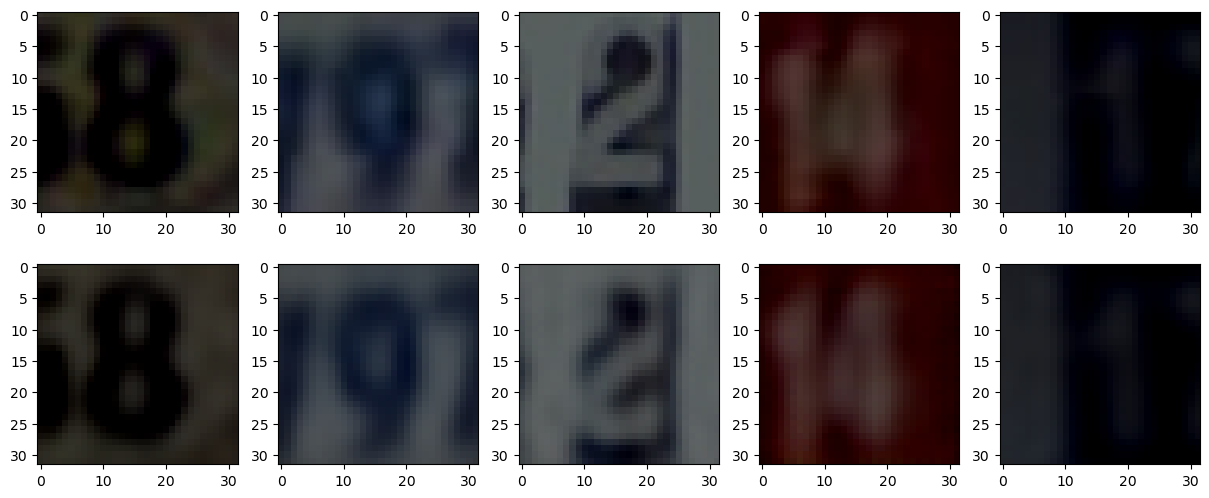

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torch

w = 3
n_imgs = 5

model = model.to("cuda")
idx = np.random.choice(len(test_set), replace=False, size=n_imgs).tolist()
imgs = [test_set[i][0] for i in idx]
imgs_in = torch.stack(imgs).to("cuda")
out = model(imgs_in).detach().cpu().numpy()

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(n_imgs * w, 2 * w))
for i in range(n_imgs):
    img = imgs[i] # [imgs[i][0], imgs[i][1], imgs[i][2]]
    oimg = out[i]
    img2 = np.stack((img[0, :, :], img[1, :, :], img[2, :, :]), axis=-1)
    out2 = np.stack((oimg[0], oimg[1], oimg[2]), axis=-1)
    img2 = itransform(img2)
    out2 = itransform(out2)
    print(img2.shape)
    print(out2.shape)
    print(img2.max(), img2.min())
    axs[0][i].imshow(img2)
    axs[1][i].imshow(out2)

In [11]:
train_set[0][1].device

NameError: name 'train_set' is not defined